# Indian Accident Dataset — Exploratory Data Analysis (2021)

## Executive Summary

This notebook presents an **Exploratory Data Analysis (EDA)** of accident counts across **Indian States**, **Union Territories (UTs)**, and **major Cities** for the year **2021**. The data is segmented by **gender** (Male, Female) and **age groups**, enabling accident analysis, risk assessment, and regional comparison studies.

### Dataset Scope
- **Gender:** Male, Female  
- **Age groups:** 0–14, 14–18, 18–30, 30–45, 45–60, 60+ years  
- **Geographic levels:** State, Union Territory, City  

### Objectives
1. Understand data structure and quality  
2. Compare accident patterns across regions and demographics  
3. Identify high-risk age groups and gender disparities  
4. Support evidence-based policy and safety planning

---
## 1. Environment Setup & Data Loading

In [13]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for clear, publication-style plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 11
sns.set_style("whitegrid")
sns.set_palette("husl")

# Load dataset
DATA_PATH = "Dataset/Indian-Accident-Dataset.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset loaded successfully.")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully.
Shape: 89 rows × 14 columns


---
## 2. Data Structure & Overview

In [14]:
# Column names and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           89 non-null     object
 1   Region         89 non-null     object
 2   Male(0-14)     89 non-null     int64 
 3   Female(0-14)   89 non-null     int64 
 4   Male(14-18)    89 non-null     int64 
 5   Female(14-18)  89 non-null     int64 
 6   Male(18-30)    89 non-null     int64 
 7   Female(18-30)  89 non-null     int64 
 8   Male(30-45)    89 non-null     int64 
 9   Female(30-45)  89 non-null     int64 
 10  Male(45-60)    89 non-null     int64 
 11  Female(45-60)  89 non-null     int64 
 12  Male(60+)      89 non-null     int64 
 13  Female(60+)    89 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 9.9+ KB


In [15]:
# First and sample rows
display(df.head(10))

,Type,Region,Male(0-14),Female(0-14),Male(14-18),Female(14-18),Male(18-30),Female(18-30),Male(30-45),Female(30-45),Male(45-60),Female(45-60),Male(60+),Female(60+)
0,State,Andhra Pradesh,299,157,582,105,3268,437,4622,687,3324,662,1422,479
1,State,Arunachal Pradesh,10,6,7,5,148,19,135,16,35,3,5,2
2,State,Assam,103,43,259,84,1234,250,1357,268,601,134,152,39
3,State,Bihar,1113,444,1816,543,3777,1059,2679,922,1668,477,741,166
4,State,Chhattisgarh,738,470,674,321,3876,1067,4006,1005,2814,763,1277,511
5,State,Goa,5,3,6,2,153,15,161,19,115,15,76,26
6,State,Gujarat,380,215,751,205,4564,924,6472,984,4662,716,1746,432
7,State,Haryana,261,137,401,184,4155,720,4686,695,2807,315,915,215
8,State,Himachal Pradesh,54,38,68,25,599,96,840,127,706,102,275,73
9,State,Jharkhand,137,45,851,148,1875,332,1770,342,1033,285,402,148


### 2.1 Breakdown by Type (State / UT / City)

Understanding how many regions we have at each geographic level.

In [16]:
print("Count by Type:")
print(df['Type'].value_counts().to_string())
print("\nUnique Regions:", df['Region'].nunique())

Count by Type:
Type
City     53
State    28
UT        8

Unique Regions: 89


---
## 3. Data Quality Checks

In [17]:
# Missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values.")

# Duplicates
dup_region = df.duplicated(subset=['Type', 'Region']).sum()
print(f"\nDuplicate (Type, Region) rows: {dup_region}")

# Negative or invalid counts (accident counts should be >= 0)
count_cols = [c for c in df.columns if c not in ['Type', 'Region']]
negative = (df[count_cols] < 0).any(axis=1).sum()
print(f"Rows with any negative count: {negative}")

Missing values per column:
No missing values.

Duplicate (Type, Region) rows: 0
Rows with any negative count: 0


---
## 4. Derived Metrics & Summary Statistics

We create **total accidents per row** and **gender/age aggregates** for easier analysis.

In [18]:
# Columns that hold accident counts (exclude Type, Region)
count_cols = [c for c in df.columns if c not in ['Type', 'Region']]

# Total accidents per region
df['Total_Accidents'] = df[count_cols].sum(axis=1)

# Gender totals
male_cols = [c for c in count_cols if c.startswith('Male')]
female_cols = [c for c in count_cols if c.startswith('Female')]
df['Male_Total'] = df[male_cols].sum(axis=1)
df['Female_Total'] = df[female_cols].sum(axis=1)

# Age group labels (for later use)
age_groups = ['0-14', '14-18', '18-30', '30-45', '45-60', '60+']

# Summary statistics for total accidents
df[['Total_Accidents', 'Male_Total', 'Female_Total']].describe()

,Total_Accidents,Male_Total,Female_Total
count,89.000000,89.000000,89.000000
mean,5067.224719,4133.640449,933.584270
std,10063.909035,8138.922873,1956.982161
min,6.000000,6.000000,0.000000
25%,379.000000,313.000000,66.000000
50%,732.000000,610.000000,139.000000
75%,3003.000000,2542.000000,413.000000
max,58233.000000,47180.000000,11053.000000


---
## 5. Visualizations

### 5.1 Accident Distribution by Geographic Type

Total accident count aggregated by **State**, **UT**, and **City** level.

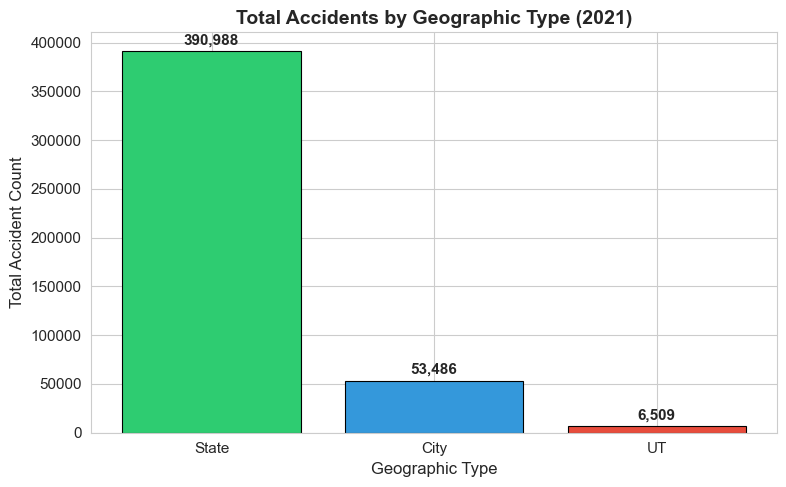

In [19]:
by_type = df.groupby('Type')['Total_Accidents'].sum().sort_values(ascending=False)
colors = ['#2ecc71', '#3498db', '#e74c3c']

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(by_type.index, by_type.values, color=colors, edgecolor='black', linewidth=0.8)
ax.set_ylabel('Total Accident Count', fontsize=12)
ax.set_xlabel('Geographic Type', fontsize=12)
ax.set_title('Total Accidents by Geographic Type (2021)', fontsize=14, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

**Insight:** States contribute the largest share of accidents (aggregate of all state-level counts), followed by Cities and UTs. This aligns with states covering wider populations and road networks.

### 5.2 Top 15 Regions by Total Accidents

Identifying the regions with the highest accident counts for prioritization.

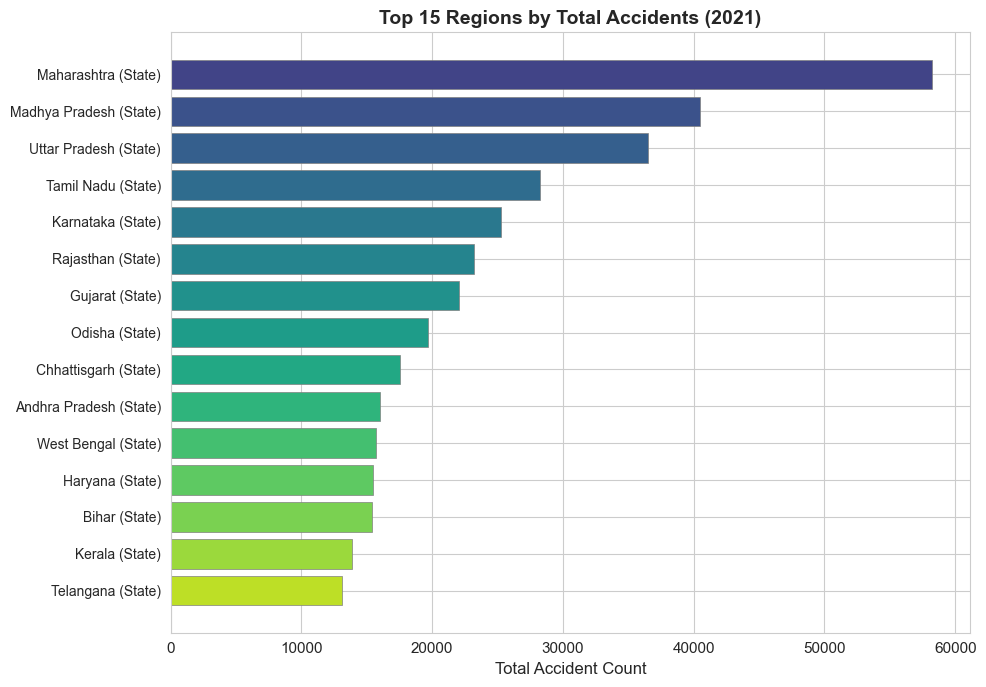

In [20]:
top15 = df.nlargest(15, 'Total_Accidents')[['Type', 'Region', 'Total_Accidents']].copy()
top15['Label'] = top15['Region'] + ' (' + top15['Type'] + ')'

fig, ax = plt.subplots(figsize=(10, 7))
y_pos = range(len(top15))
bars = ax.barh(y_pos, top15['Total_Accidents'].values, color=plt.cm.viridis(np.linspace(0.2, 0.9, len(top15))), edgecolor='gray', linewidth=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(top15['Label'], fontsize=10)
ax.set_xlabel('Total Accident Count', fontsize=12)
ax.set_title('Top 15 Regions by Total Accidents (2021)', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### 5.3 Gender Comparison — Overall

Male vs Female total accident counts across the entire dataset.

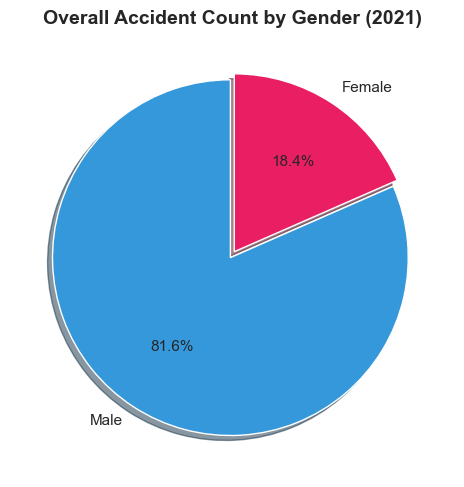

Male total: 367,894  |  Female total: 83,089


In [21]:
gender_totals = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': [df['Male_Total'].sum(), df['Female_Total'].sum()]
})
colors_g = ['#3498db', '#e91e63']
fig, ax = plt.subplots(figsize=(6, 5))
ax.pie(gender_totals['Count'], labels=gender_totals['Gender'], autopct='%1.1f%%', startangle=90,
       colors=colors_g, explode=(0.02, 0.02), shadow=True)
ax.set_title('Overall Accident Count by Gender (2021)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print(f"Male total: {gender_totals['Count'].iloc[0]:,}  |  Female total: {gender_totals['Count'].iloc[1]:,}")

### 5.4 Accident Distribution by Age Group

Which age groups are most involved in accidents (aggregated across all regions)?

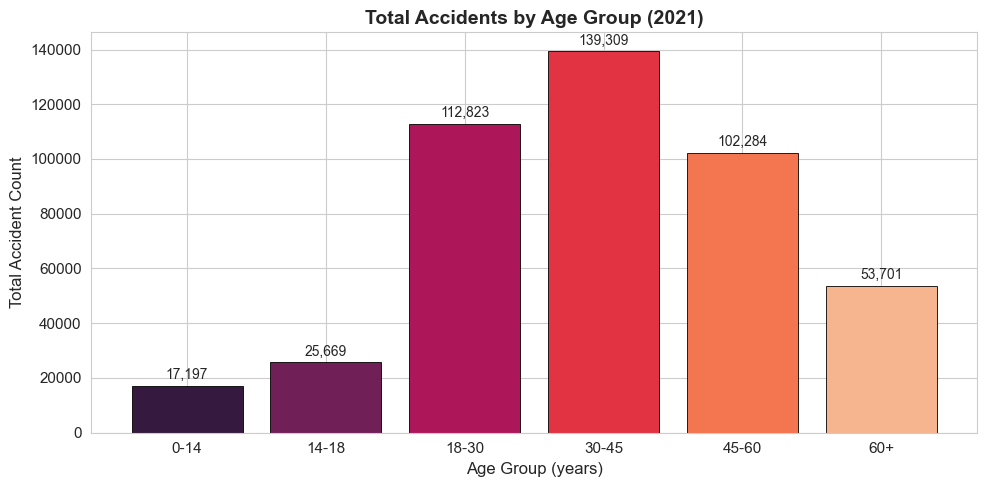

In [22]:
# Map columns to age groups and sum
age_mapping = {
    '0-14': ['Male(0-14)', 'Female(0-14)'],
    '14-18': ['Male(14-18)', 'Female(14-18)'],
    '18-30': ['Male(18-30)', 'Female(18-30)'],
    '30-45': ['Male(30-45)', 'Female(30-45)'],
    '45-60': ['Male(45-60)', 'Female(45-60)'],
    '60+': ['Male(60+)', 'Female(60+)'],
}
age_totals = {ag: df[cols].sum().sum() for ag, cols in age_mapping.items()}
age_series = pd.Series(age_totals)

fig, ax = plt.subplots(figsize=(10, 5))
x_pos = np.arange(len(age_series))
bars = ax.bar(x_pos, age_series.values, color=sns.color_palette("rocket", len(age_series)), edgecolor='black', linewidth=0.6)
ax.set_xticks(x_pos)
ax.set_xticklabels(age_series.index, fontsize=11)
ax.set_ylabel('Total Accident Count', fontsize=12)
ax.set_xlabel('Age Group (years)', fontsize=12)
ax.set_title('Total Accidents by Age Group (2021)', fontsize=14, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

**Insight:** The **18–30** and **30–45** age groups typically show the highest accident counts, reflecting higher exposure (driving, commuting). The **0–14** and **60+** groups usually have lower counts.

### 5.5 Gender × Age Group (Stacked Bar)

Compare Male vs Female accident counts across each age group.

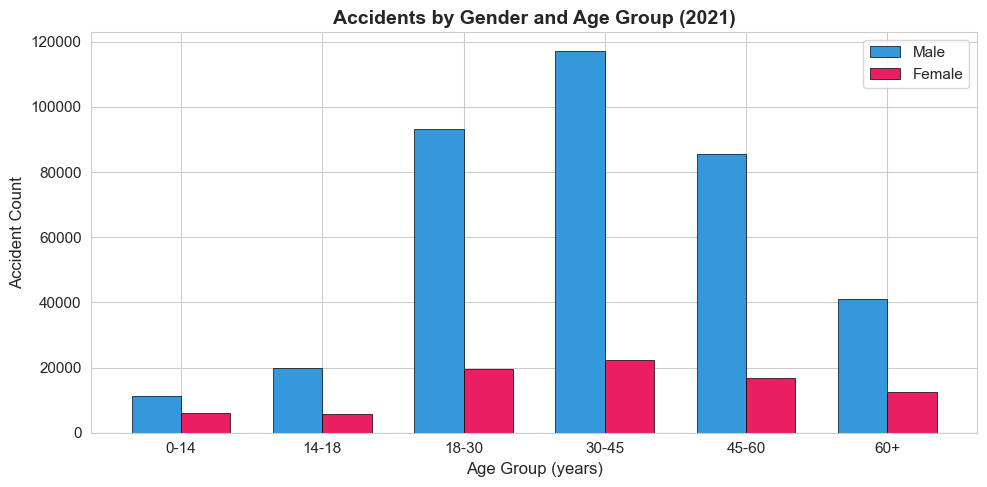

In [23]:
male_by_age = [df[f'Male({ag})'].sum() for ag in age_groups]
female_by_age = [df[f'Female({ag})'].sum() for ag in age_groups]
x = np.arange(len(age_groups))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, male_by_age, width, label='Male', color='#3498db', edgecolor='black', linewidth=0.5)
ax.bar(x + width/2, female_by_age, width, label='Female', color='#e91e63', edgecolor='black', linewidth=0.5)
ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.set_ylabel('Accident Count', fontsize=12)
ax.set_xlabel('Age Group (years)', fontsize=12)
ax.set_title('Accidents by Gender and Age Group (2021)', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

### 5.6 Top 10 States — Accident Count Comparison

Focus on state-level totals for regional policy context.

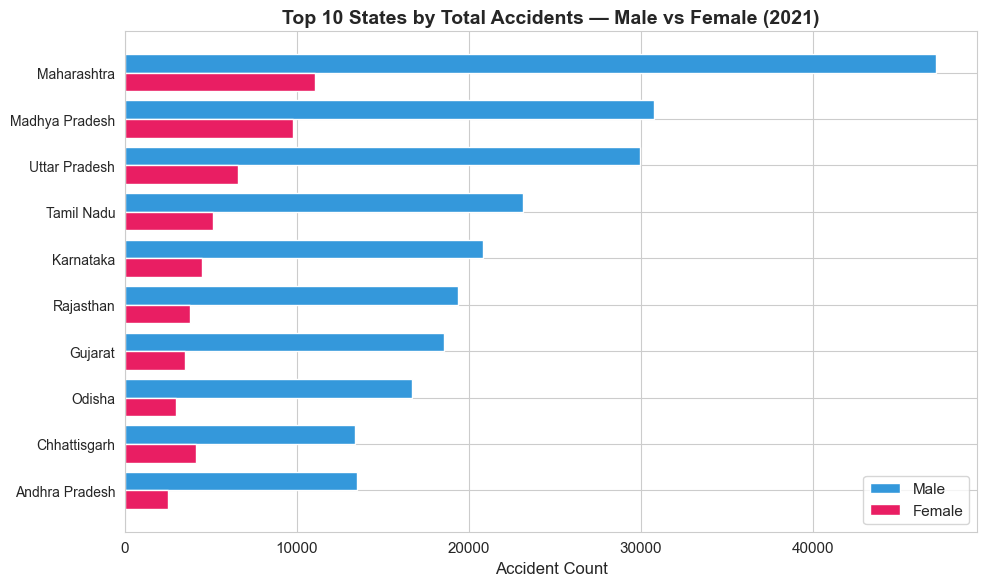

In [24]:
states = df[df['Type'] == 'State'].nlargest(10, 'Total_Accidents')
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(states))
ax.barh(y_pos, states['Male_Total'].values, label='Male', color='#3498db', height=0.4)
ax.barh([i + 0.4 for i in y_pos], states['Female_Total'].values, label='Female', color='#e91e63', height=0.4)
ax.set_yticks([i + 0.2 for i in y_pos])
ax.set_yticklabels(states['Region'].values, fontsize=10)
ax.set_xlabel('Accident Count', fontsize=12)
ax.set_title('Top 10 States by Total Accidents — Male vs Female (2021)', fontsize=14, fontweight='bold')
ax.legend()
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### 5.7 Heatmap: Top 12 Regions × Age Group

Accident count by age group for the top 12 regions (normalized by row for pattern comparison).

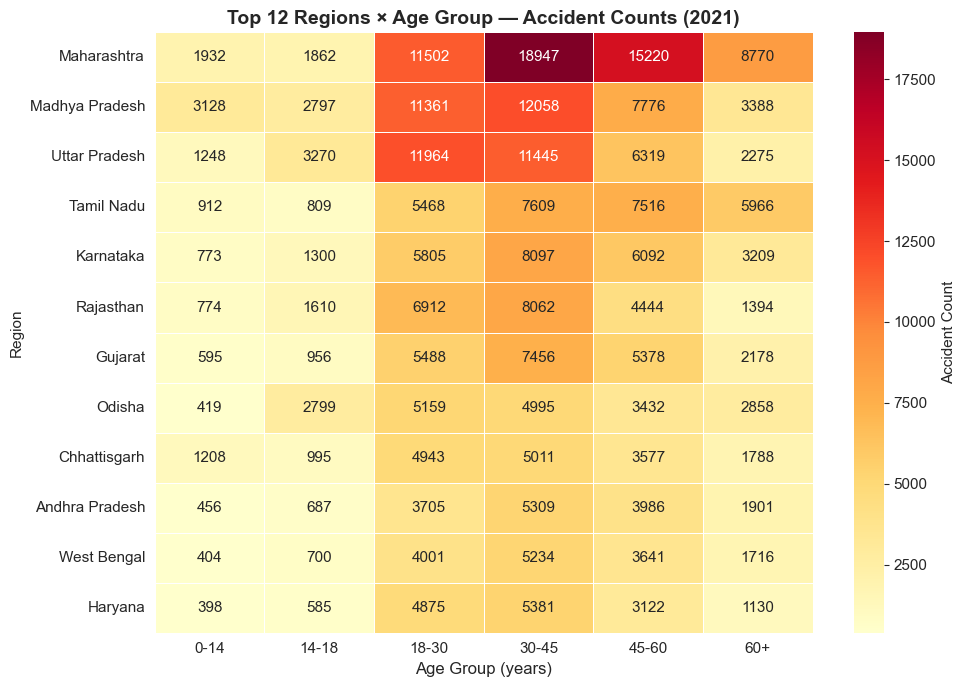

In [25]:
top12 = df.nlargest(12, 'Total_Accidents')
heat_cols = [f'Male({ag})' for ag in age_groups] + [f'Female({ag})' for ag in age_groups]
heat_df = top12.set_index('Region')[heat_cols]
# Row-normalize to show age profile per region (proportion within region)
heat_pct = heat_df.div(heat_df.sum(axis=1), axis=0) * 100
# Simplify: use age group totals per region (sum male+female per age)
age_cols = [(f'Male({ag})', f'Female({ag})') for ag in age_groups]
heat_simple = top12.set_index('Region').copy()
heat_simple = pd.DataFrame({
    ag: heat_simple[f'Male({ag})'] + heat_simple[f'Female({ag})'] for ag in age_groups
})

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(heat_simple, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, ax=ax,
            cbar_kws={'label': 'Accident Count'})
ax.set_title('Top 12 Regions × Age Group — Accident Counts (2021)', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Group (years)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 5.8 Age Profile by Type (State vs UT vs City)

Average proportion of accidents in each age group, by geographic type.

/var/folders/zt/jmt_x5912x1bfqdk_f00fm_r0000gn/T/ipykernel_7493/544195878.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_type_age = df.groupby('Type').apply(get_age_proportion)


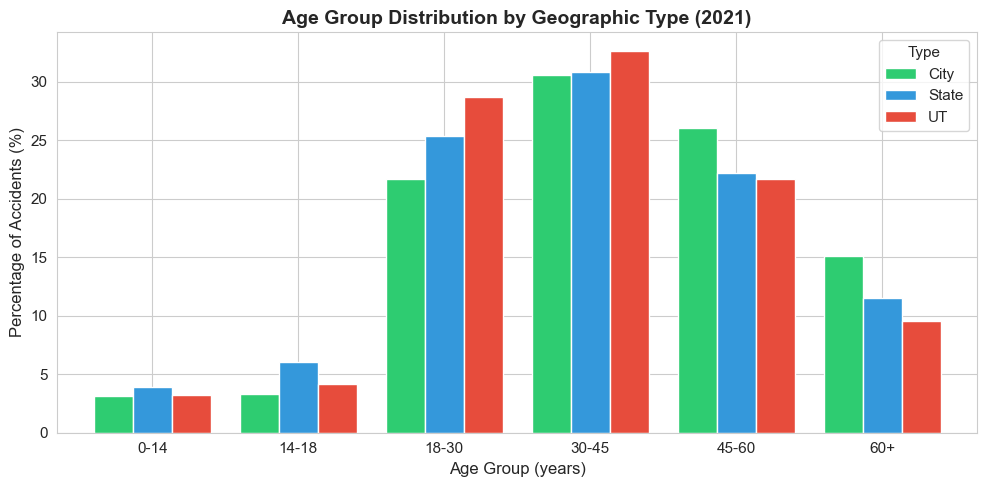

In [26]:
def get_age_proportion(data):
    total = data['Total_Accidents'].sum()
    if total == 0:
        return pd.Series({ag: 0 for ag in age_groups})
    return pd.Series({
        ag: (data[f'Male({ag})'].sum() + data[f'Female({ag})'].sum()) / total * 100
        for ag in age_groups
    })

by_type_age = df.groupby('Type').apply(get_age_proportion)
fig, ax = plt.subplots(figsize=(10, 5))
by_type_age.T.plot(kind='bar', ax=ax, width=0.8, color=['#2ecc71', '#3498db', '#e74c3c'])
ax.set_xticklabels(age_groups, rotation=0)
ax.set_ylabel('Percentage of Accidents (%)', fontsize=12)
ax.set_xlabel('Age Group (years)', fontsize=12)
ax.set_title('Age Group Distribution by Geographic Type (2021)', fontsize=14, fontweight='bold')
ax.legend(title='Type')
plt.tight_layout()
plt.show()

### 5.9 Box Plot: Total Accidents by Type

Distribution of total accidents per region within each type (State, UT, City).

/var/folders/zt/jmt_x5912x1bfqdk_f00fm_r0000gn/T/ipykernel_7493/1835542185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Total_Accidents', palette=['#2ecc71', '#3498db', '#e74c3c'], ax=ax)


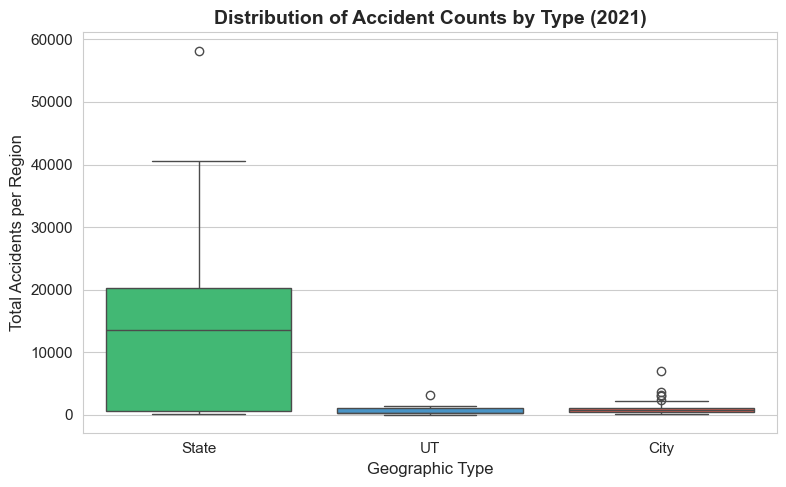

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='Type', y='Total_Accidents', palette=['#2ecc71', '#3498db', '#e74c3c'], ax=ax)
ax.set_ylabel('Total Accidents per Region', fontsize=12)
ax.set_xlabel('Geographic Type', fontsize=12)
ax.set_title('Distribution of Accident Counts by Type (2021)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 6. Key Takeaways & Conclusions

1. **Geographic type:** States account for the bulk of accidents in aggregate; cities and UTs show high per-region variation.  
2. **Gender:** Male accident counts are substantially higher than female across all age groups, consistent with higher exposure (e.g., driving participation).  
3. **Age:** The **18–30** and **30–45** age groups dominate accident counts; **0–14** and **60+** are lower.  
4. **Regions:** A small set of states and cities (e.g., Maharashtra, Uttar Pradesh, Madhya Pradesh, Tamil Nadu) lead in total counts and warrant focused safety interventions.  
5. **Data quality:** No missing values or duplicates were found; the dataset is suitable for further modeling and reporting.

*This EDA supports accident analysis, risk assessment, and regional comparison studies for evidence-based policy and safety planning.*